In [1]:
#import libraries
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

In [2]:
#load dataset
df = pd.read_csv("aug_train.csv")

In [3]:
#check data properties
df

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,167647,Male,22,1,7.0,1,< 1 Year,No,2630.0,152.0,16,0
1,17163,Male,42,1,28.0,0,1-2 Year,Yes,43327.0,26.0,135,0
2,32023,Female,66,1,33.0,0,1-2 Year,Yes,35841.0,124.0,253,0
3,87447,Female,22,1,33.0,0,< 1 Year,No,27645.0,152.0,69,0
4,501933,Male,28,1,46.0,1,< 1 Year,No,29023.0,152.0,211,0
...,...,...,...,...,...,...,...,...,...,...,...,...
382149,164549,Male,24,1,15.0,0,< 1 Year,Yes,23938.0,152.0,105,0
382150,247064,Male,27,1,28.0,1,< 1 Year,No,336395.0,152.0,144,0
382151,165293,Male,45,1,28.0,0,1-2 Year,Yes,40443.0,26.0,187,0
382152,383241,Female,28,1,28.0,1,< 1 Year,No,25380.0,152.0,208,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 382154 entries, 0 to 382153
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    382154 non-null  int64  
 1   Gender                382154 non-null  object 
 2   Age                   382154 non-null  int64  
 3   Driving_License       382154 non-null  int64  
 4   Region_Code           382154 non-null  float64
 5   Previously_Insured    382154 non-null  int64  
 6   Vehicle_Age           382154 non-null  object 
 7   Vehicle_Damage        382154 non-null  object 
 8   Annual_Premium        382154 non-null  float64
 9   Policy_Sales_Channel  382154 non-null  float64
 10  Vintage               382154 non-null  int64  
 11  Response              382154 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 35.0+ MB


In [5]:
#From the printed result, we can see that there is no null values in any column
#to double check
df.isnull().any().any()

False

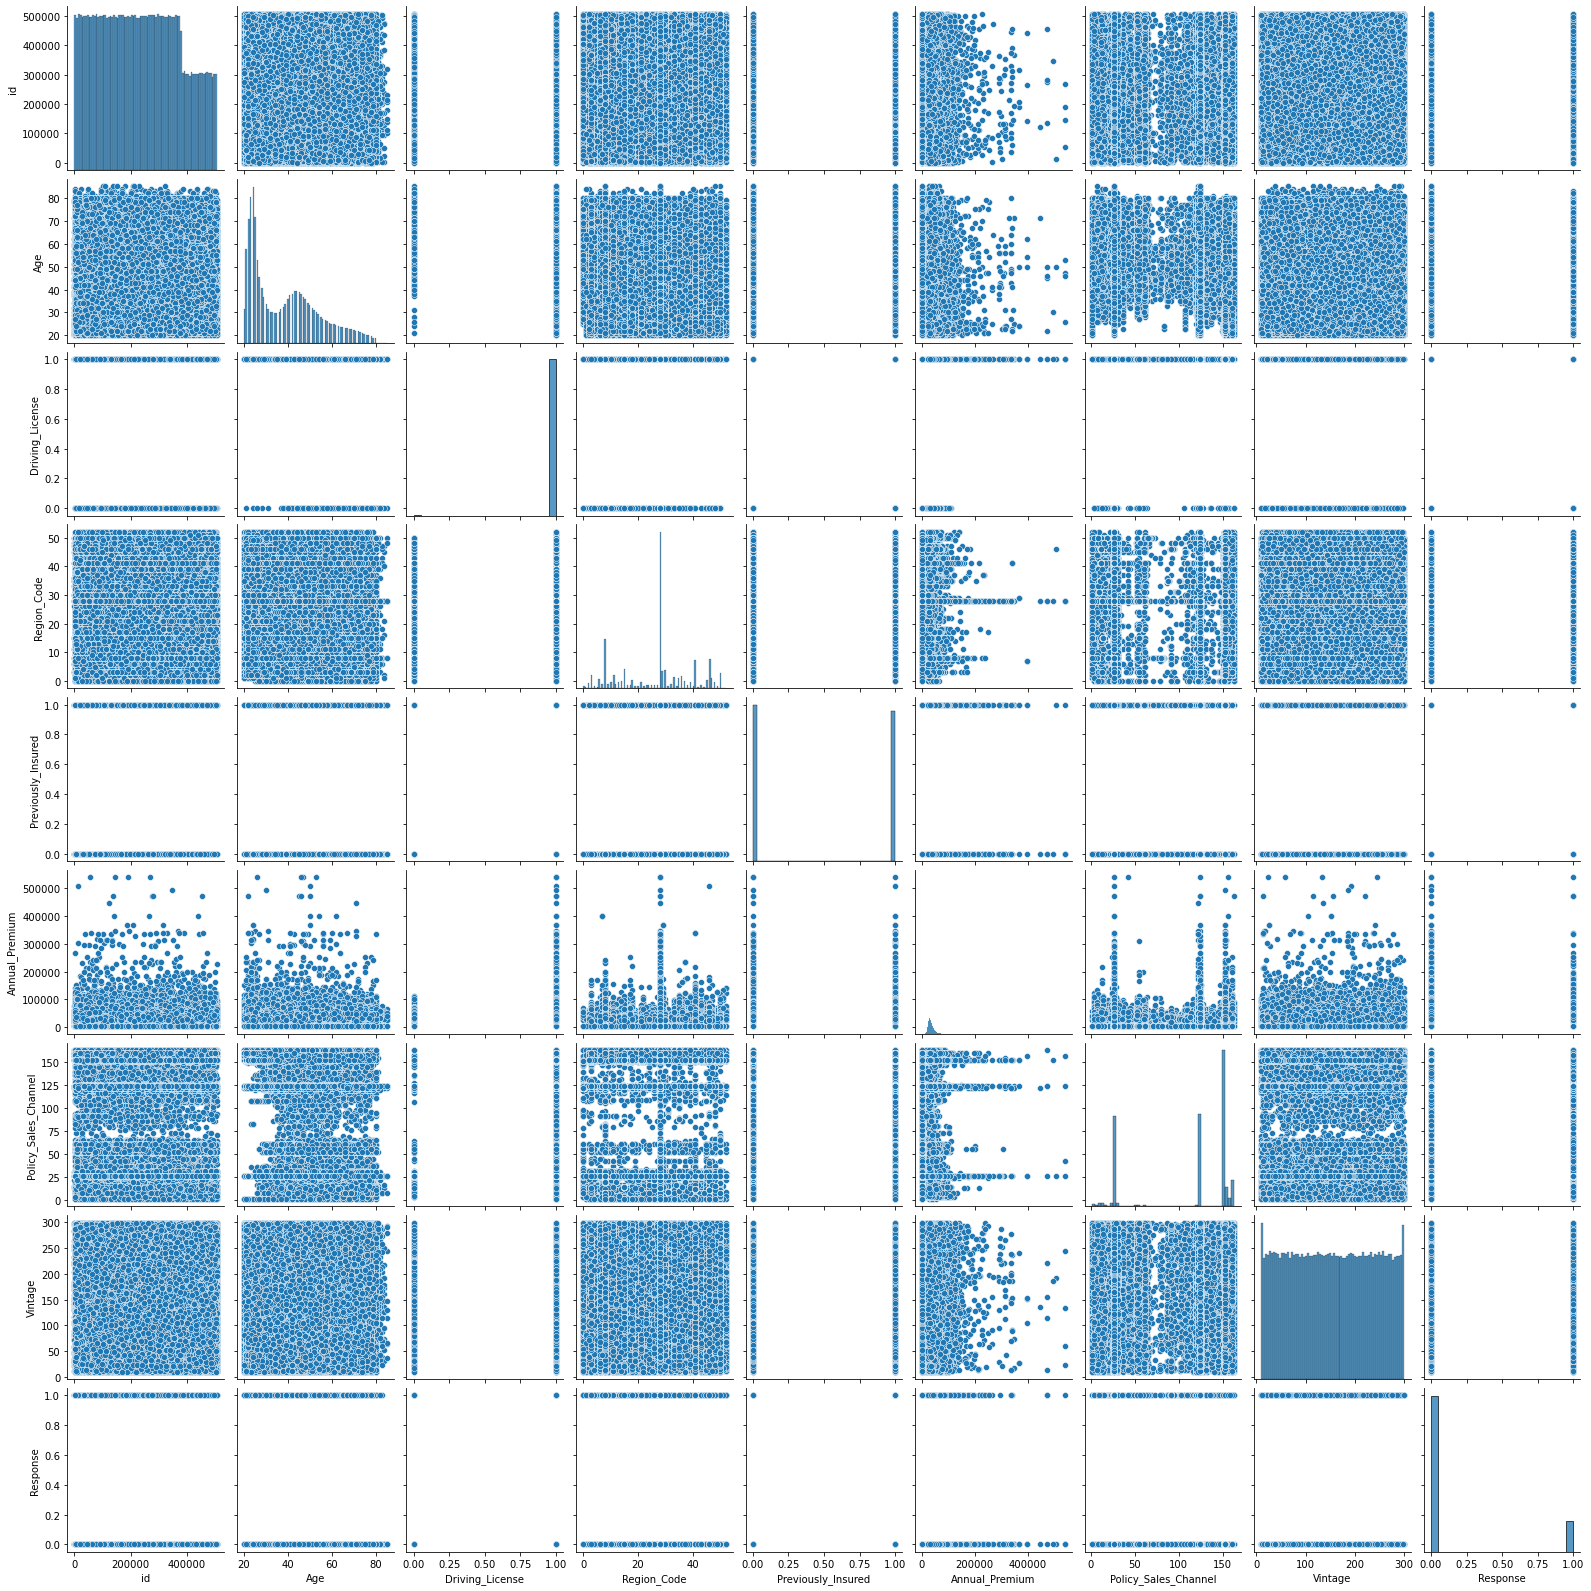

In [6]:
#Data visualization using pairplot
#Pairplot only considers numerical data, hence 9 features in
sns.pairplot(df)

In [7]:
#deal with categorical data
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df['Vehicle_Age'] = le.fit_transform(df['Vehicle_Age'])
df['Vehicle_Damage'] = le.fit_transform(df['Vehicle_Damage'])
df

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,167647,1,22,1,7.0,1,1,0,2630.0,152.0,16,0
1,17163,1,42,1,28.0,0,0,1,43327.0,26.0,135,0
2,32023,0,66,1,33.0,0,0,1,35841.0,124.0,253,0
3,87447,0,22,1,33.0,0,1,0,27645.0,152.0,69,0
4,501933,1,28,1,46.0,1,1,0,29023.0,152.0,211,0
...,...,...,...,...,...,...,...,...,...,...,...,...
382149,164549,1,24,1,15.0,0,1,1,23938.0,152.0,105,0
382150,247064,1,27,1,28.0,1,1,0,336395.0,152.0,144,0
382151,165293,1,45,1,28.0,0,0,1,40443.0,26.0,187,0
382152,383241,0,28,1,28.0,1,1,0,25380.0,152.0,208,0


In [8]:
#split into x and y
x = df.drop(['Response'], axis = 1)
y = df['Response']

In [9]:
#use train-test split to split into training and testing data sets
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y,test_size=0.2,random_state=0)

<AxesSubplot:>

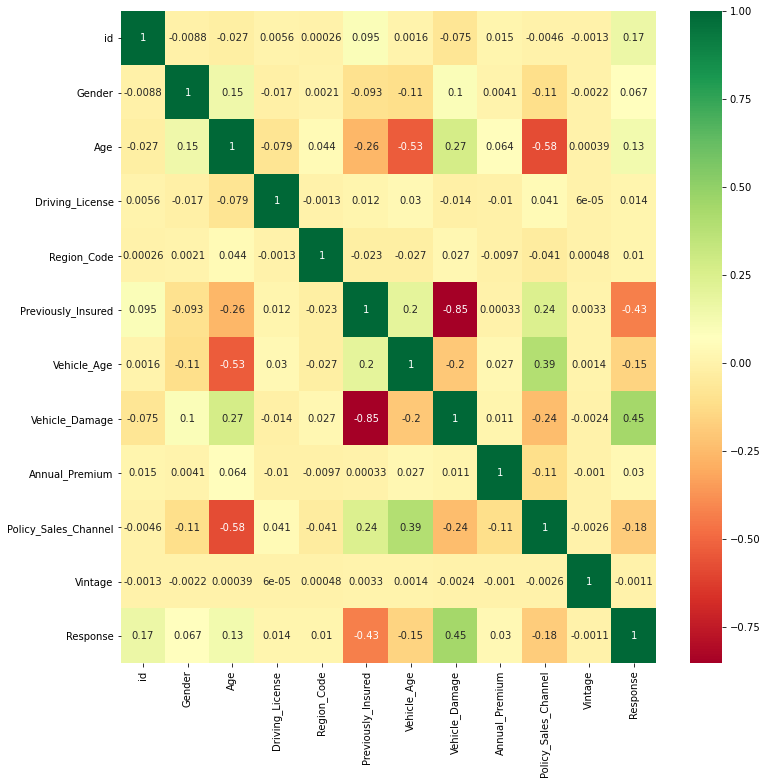

In [10]:
#drop unrelated columns
#use heatmap

#concat xtrain and ytrain to form trainset
train = pd.concat([xtrain,ytrain],axis=1)
corrmat = train.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(12,12))
#plot heat map
g=sns.heatmap(train[top_corr_features].corr(),annot=True,cmap="RdYlGn")
g

From the heatmap, Vintage column is the least correlated to our target variable, Response, which means it is almost unrelated with Response. As such, we can drop the Vintage column from our data.

[0.28466914 0.00606073 0.11680338 0.0005992  0.06878599 0.08526449
 0.02755233 0.12693541 0.10557792 0.05783975 0.11991166]


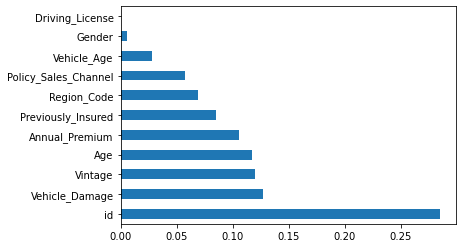

In [11]:
#check feature importance
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
model.fit(xtrain,ytrain)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(11).plot(kind='barh')
plt.show()

Using feature importance, we could see that Driving_License and Gender are both of very low significance. As such, we could also remove these columns

In [12]:
#drop the unwanted columns
xtrain = xtrain.drop(['Vintage', 'Driving_License', 'Gender'], axis = 1)
xtest = xtest.drop(['Vintage', 'Driving_License', 'Gender'], axis = 1)

# Supervised Learning 

### Naive Bayes

In [13]:
#Perform supervised learning using Naive Bayes
from sklearn.naive_bayes import GaussianNB
NB = GaussianNB()                      
NB.fit(xtrain, ytrain)                  
Pred = NB.predict(xtest)  

In [14]:
#compare accuracies for both data sets to ensure there is no overfitting problem
print(NB.score(xtest,ytest)) #show accuracy for testing set
print(NB.score(xtrain,ytrain)) #show accuracy for training set

0.8459656422132381
0.8475351870811159


In [15]:
from sklearn.metrics import confusion_matrix,classification_report
ConMat = confusion_matrix(ytest, Pred)
ConMat

array([[62770,  1036],
       [10737,  1888]], dtype=int64)

In [16]:
#Display classification report
print(classification_report(ytest,Pred)) 

              precision    recall  f1-score   support

           0       0.85      0.98      0.91     63806
           1       0.65      0.15      0.24     12625

    accuracy                           0.85     76431
   macro avg       0.75      0.57      0.58     76431
weighted avg       0.82      0.85      0.80     76431



In [17]:
#Use different features to predict target variable and evaluate model performance
#using Naive Bayes

In [18]:
#Use 2 features with the highest correlation
xmost = df[['Previously_Insured','Vehicle_Damage']]
ymost = y

In [19]:
#perform train-test split
xtrain2, xtest2, ytrain2, ytest2 = train_test_split(xmost, ymost,test_size=0.2,random_state=0)

In [20]:
#fit model and do prediction
NB.fit(xtrain2, ytrain2)                  
Pred2 = NB.predict(xtest2) 

In [21]:
print(NB.score(xtest2,ytest2)) #show accuracy for testing set
print(NB.score(xtrain2,ytrain2)) #show accuracy for training set

0.7004226033939108
0.7005066678005907


In [22]:
#Display confusion matrix and classificaiton report 
ConMat2 = confusion_matrix(ytest2, Pred2)
print(ConMat2)
print(classification_report(ytest2,Pred2)) 

[[41069 22737]
 [  160 12465]]
              precision    recall  f1-score   support

           0       1.00      0.64      0.78     63806
           1       0.35      0.99      0.52     12625

    accuracy                           0.70     76431
   macro avg       0.68      0.82      0.65     76431
weighted avg       0.89      0.70      0.74     76431



### Logistic Regression

In [23]:
#Perform supervised learning using Logistic Regression
from sklearn.linear_model import LogisticRegression
#scale data using minmax scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_xtrain = scaler.fit_transform(xtrain)
scaled_xtest = scaler.transform(xtest)

In [24]:
#compare performance before and after scaling data
logreg = LogisticRegression()
logreg.fit(xtrain,ytrain)
print('LR accuracy score before scaling: ',logreg.score(xtest, ytest))
print(confusion_matrix(ytest, logreg.predict(xtest)))
print(classification_report(ytest,logreg.predict(xtest)))

LR accuracy score before scaling:  0.8344258219832267
[[63550   256]
 [12399   226]]
              precision    recall  f1-score   support

           0       0.84      1.00      0.91     63806
           1       0.47      0.02      0.03     12625

    accuracy                           0.83     76431
   macro avg       0.65      0.51      0.47     76431
weighted avg       0.78      0.83      0.76     76431



In [25]:
logreg = LogisticRegression()
logreg.fit(scaled_xtrain,ytrain)
print('LR accuracy score after scaling: ',logreg.score(scaled_xtest, ytest))

LR accuracy score after scaling:  0.8790673941201869


In [26]:
#confusion matrix
logreg_cm = confusion_matrix(ytest, logreg.predict(scaled_xtest))
logreg_cm

array([[61702,  2104],
       [ 7139,  5486]], dtype=int64)

In [27]:
print(classification_report(ytest,logreg.predict(scaled_xtest)))

              precision    recall  f1-score   support

           0       0.90      0.97      0.93     63806
           1       0.72      0.43      0.54     12625

    accuracy                           0.88     76431
   macro avg       0.81      0.70      0.74     76431
weighted avg       0.87      0.88      0.87     76431



### KNN

In [28]:
#Perform supervised learning using KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(xtrain,ytrain)
ypred=knn.predict(xtest)

In [29]:
knn.score(xtest,ytest)

0.8163179861574492

In [30]:
print(confusion_matrix(ytest,ypred))
print(classification_report(ytest,ypred)) 

[[60786  3020]
 [11019  1606]]
              precision    recall  f1-score   support

           0       0.85      0.95      0.90     63806
           1       0.35      0.13      0.19     12625

    accuracy                           0.82     76431
   macro avg       0.60      0.54      0.54     76431
weighted avg       0.76      0.82      0.78     76431



# Compare results

Naive Bayes has a accuracy score of 0.846 <br>
Naive Bayes has an accuracy score of 0.700 when using 2 features with the highest correlation: Previously_Insured and Vehicle_Damage<br>
Logistic Regression using scaled data has a accuracy score of 0.879<br>
while KNN has a accuracy score of 0.816<br>
As shown above Logistic regression is the most accurate model among the 3 models, whereas KNN has the lowest accuracy.<br>
For logistic regression, the precision and recall for 1 showed a significant improvement after scaling the data, which shows that the performance of the model increases after data scaling<br>
All three models shows a high recall for 0 but a low recall for 1, which means that among the predicted 1, many are not actually 1 but 0

# Conclusion

Logistic Regression after scaling has the highest accuracy rate among the 3 models. <br>
Since all models has a low recall for 1, there will be a rather large amount of data mistakenly predicted as 1 when it should be 0
